<a href="https://colab.research.google.com/github/FabiolaSepulveda/DataScience/blob/main/AluraStoreLatam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Importación de datos



In [145]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [126]:
# Lista de URLs y nombres de tiendas
urls = [
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv", "Tienda 1"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv", "Tienda 2"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv", "Tienda 3"),
    ("https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv", "Tienda 4"),
]

# Lectura y unión de los archivos
dataframes = []
for url, nombre in urls:
    df = pd.read_csv(url)
    df["tienda"] = nombre
    dataframes.append(df)
df = pd.concat(dataframes, ignore_index=True)

# Cálculo de los ingresos de cada tienda
df["Ingreso"] = df["Precio"] * df["Cantidad de cuotas"]
ingresos = df.groupby("tienda")["Ingreso"].sum().sort_values(ascending=False)

# Análisis de mayor y menor ingreso por tienda
mejor = ingresos.idxmax()
peor = ingresos.idxmin()
porcentaje_dif = ((ingresos.max() - ingresos.min()) / ingresos.min()) * 100

# Mostrar facturación total de cada tienda
print("Facturación total de cada tienda:\n")
print(f"{'Tienda':<10} | {'Facturación Total':>22}")
print("-" * 40)

for tienda, total in ingresos.items():
    print(f"{tienda:<10} | ${total:>20,.0f}.-")

print(f"\n* La tienda con mayores ingresos es {mejor}, con un total de: $ {ingresos.max():,.0f}.-")
print(f"\n* La tienda con menores ingresos es {peor}, con un total de: $ {ingresos.min():,.0f}.-\n")

Facturación total de cada tienda:

Tienda     |      Facturación Total
----------------------------------------
Tienda 1   | $       3,422,717,700.-
Tienda 2   | $       3,337,189,200.-
Tienda 3   | $       3,243,816,900.-
Tienda 4   | $       3,098,827,200.-

* La tienda con mayores ingresos es Tienda 1, con un total de: $ 3,422,717,700.-

* La tienda con menores ingresos es Tienda 4, con un total de: $ 3,098,827,200.-



#Gráficos para visualización de Análisis de facturación


                                  GRÁFICO DE BARRAS



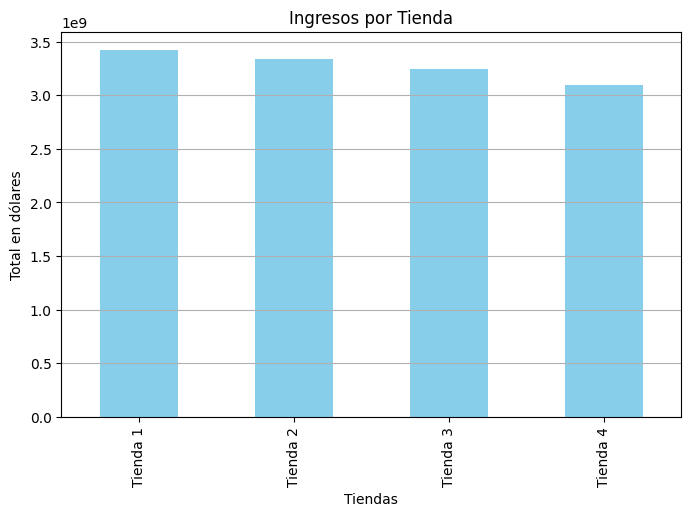


                           GRÁFICO CIRCULAR



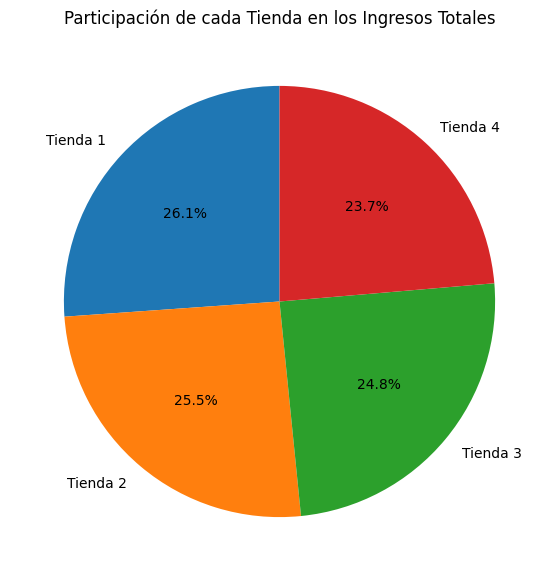


                               GRÁFICO DE CAJA



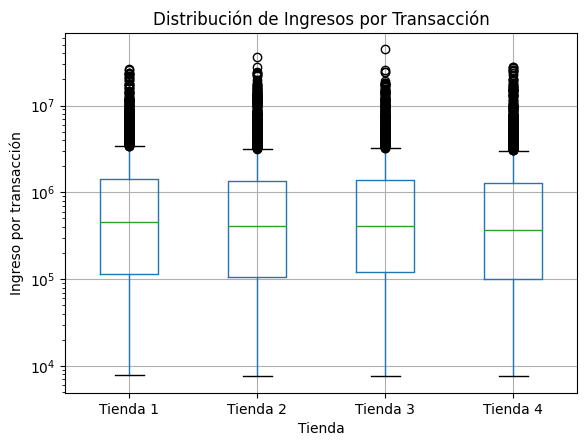

In [127]:
# Gráfico de barras
print(f"\n {'GRÁFICO DE BARRAS':>50}\n")
plt.figure(figsize=(8, 5))
ingresos.plot(kind="bar", color="skyblue", title="Ingresos por Tienda")
plt.ylabel("Total en dólares")
plt.xlabel("Tiendas")
plt.grid(axis="y")
plt.show()

# Gráfico circular
print(f"\n {'GRÁFICO CIRCULAR':>42}\n")
plt.figure(figsize=(7, 7))
ingresos.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Participación de cada Tienda en los Ingresos Totales")
plt.ylabel("")
plt.show()

# Gráfico de caja
print(f"\n {'GRÁFICO DE CAJA':>45}\n")
df.boxplot(column="Ingreso", by="tienda")
plt.title("Distribución de Ingresos por Transacción")
plt.suptitle("")
plt.xlabel("Tienda")
plt.ylabel("Ingreso por transacción")
plt.yscale("log")
plt.show()

# 2. Ventas por categoría

In [160]:
# Agrupar por tienda y categoría: suma de unidades vendidas
ventas_categoria = df.groupby(["tienda", "Categoría del Producto"])["Cantidad de cuotas"].sum().reset_index()

# Análisis de ventas por categoría
for tienda in ventas_categoria["tienda"].unique():
    top_categoria = ventas_categoria[ventas_categoria["tienda"] == tienda].sort_values("Cantidad de cuotas", ascending=False).iloc[0]
    print(f"- En la {tienda}, la categoría más vendida es {top_categoria['Categoría del Producto']}, con un total de {top_categoria['Cantidad de cuotas']:,} unidades.\n")

# Agrupar cantidad total vendida por categoría
ventas_por_categoria = df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

# Mostrar tabla
print("📦 Ventas totales por categoría (todas las tiendas):\n")
print(f"{'Categoría':<25} | {'Cantidad Vendida'}")
print("-" * 45)

for categoria, cantidad in ventas_por_categoria.items():
    print(f"{categoria:<25} | {cantidad:>16,}")

categoria_top = ventas_por_categoria.idxmax()
cantidad_top = ventas_por_categoria.max()

print(f"\n✅ La categoría más vendida es **{categoria_top}**, con un total de {cantidad_top:,} unidades.")


- En la Tienda 1, la categoría más vendida es Muebles, con un total de 1,446 unidades.

- En la Tienda 2, la categoría más vendida es Electrónicos, con un total de 1,333 unidades.

- En la Tienda 3, la categoría más vendida es Muebles, con un total de 1,408 unidades.

- En la Tienda 4, la categoría más vendida es Muebles, con un total de 1,392 unidades.

📦 Ventas totales por categoría (todas las tiendas):

Categoría                 | Cantidad Vendida
---------------------------------------------
Muebles                   |            5,511
Electrónicos              |            5,229
Juguetes                  |            3,606
Electrodomésticos         |            3,434
Deportes y diversión      |            3,175
Instrumentos musicales    |            2,312
Libros                    |            2,239
Artículos para el hogar   |            2,114

✅ La categoría más vendida es **Muebles**, con un total de 5,511 unidades.


#Gráficos para visualización de Ventas por categoría


                                                    GRÁFICO BARRAS AGRUPADAS



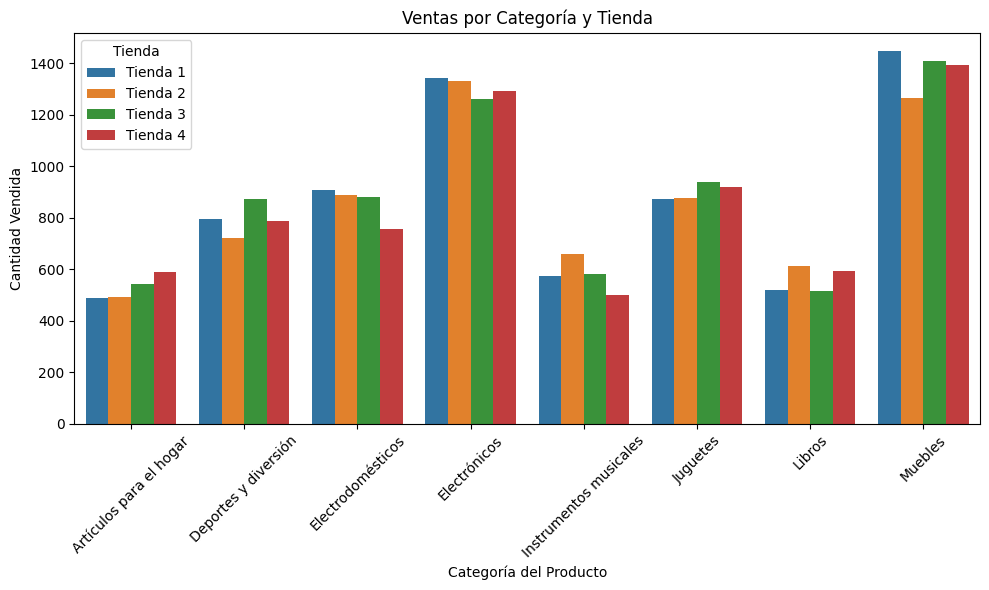


                                                    GRÁFICO BARRAS APILADAS



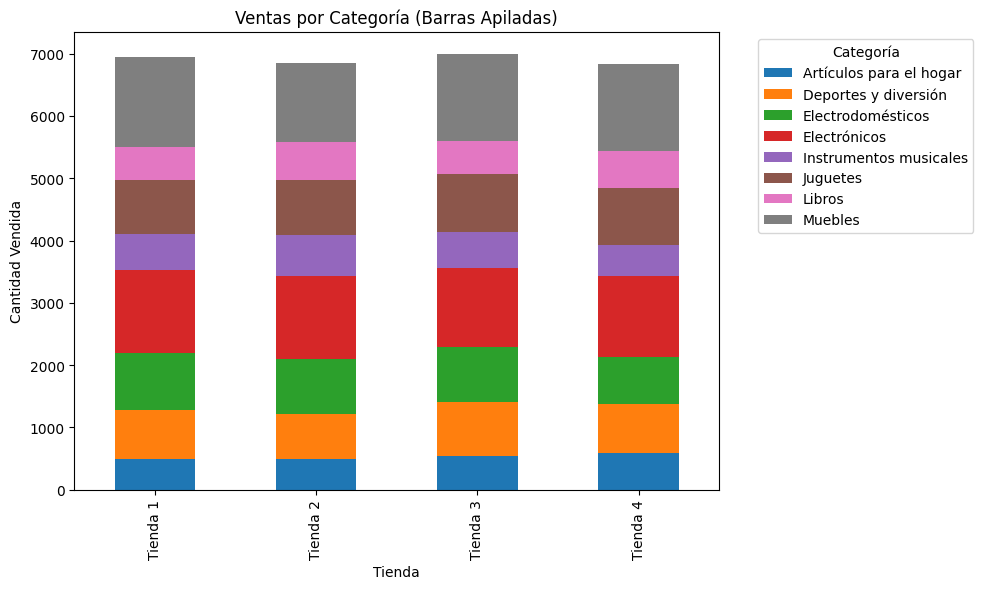


                                   GRÁFICO CIRCULAR



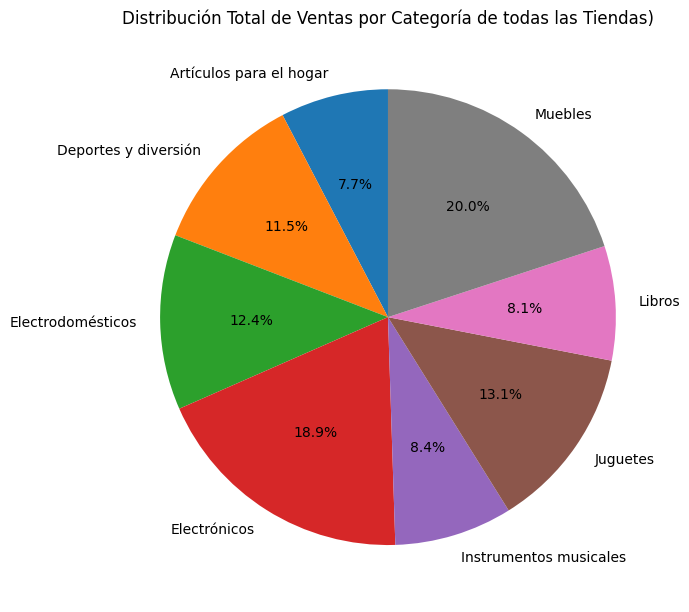

In [131]:
# gráfico barras agrupadas
print(f"\n {'GRÁFICO BARRAS AGRUPADAS':>75}\n")
plt.figure(figsize=(10, 6))
sns.barplot(data=ventas_categoria, x="Categoría del Producto", y="Cantidad de cuotas", hue="tienda")
plt.title("Ventas por Categoría y Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.legend(title="Tienda")
plt.tight_layout()
plt.show()

# gráfico barras apiladas
ventas_apiladas = df.groupby(["tienda", "Categoría del Producto"])["Cantidad de cuotas"].sum().unstack().fillna(0)
ventas_apiladas.plot(kind="bar", stacked=True, figsize=(10, 6))
print(f"\n {'GRÁFICO BARRAS APILADAS':>74}\n")
plt.title("Ventas por Categoría (Barras Apiladas)")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Tienda")
plt.legend(title="Categoría", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.tight_layout()
plt.show()

# gráfico circular
ventas_totales_categoria = df.groupby("Categoría del Producto")["Cantidad de cuotas"].sum()
print(f"\n {'GRÁFICO CIRCULAR':>50}\n")
plt.figure(figsize=(7, 7))
ventas_totales_categoria.plot(kind="pie", autopct="%1.1f%%", startangle=90)
plt.title("Distribución Total de Ventas por Categoría de todas las Tiendas)")
plt.ylabel("")
plt.tight_layout()
plt.show()

# 3. Calificación promedio de la tienda


In [134]:
# Calificación promedio por tienda
calificaciones = df.groupby("tienda")["Calificación"].mean().sort_values(ascending=False)

print("Calificación promedio por tienda:\n")
print(f"{'Tienda':<10} | {'Calificación Promedio'}")
print("-" * 38)

for tienda, prom in calificaciones.items():
    print(f"{tienda:<10} | {prom:>20.2f}")

mejor = calificaciones.idxmax()
peor = calificaciones.idxmin()

print(f"\n* La tienda mejor valorada es la {mejor}, con un promedio de {calificaciones.max():.2f}.\n")
print(f"* La tienda con menor calificación es la {peor}, con un promedio de {calificaciones.min():.2f}.")

Calificación promedio por tienda:

Tienda     | Calificación Promedio
--------------------------------------
Tienda 3   |                 4.05
Tienda 2   |                 4.04
Tienda 4   |                 4.00
Tienda 1   |                 3.98

* La tienda mejor valorada es la Tienda 3, con un promedio de 4.05.

* La tienda con menor calificación es la Tienda 1, con un promedio de 3.98.


#Gráficos para visualización de Calificación promedio de la tienda


                                        GRÁFICO DE BARRAS



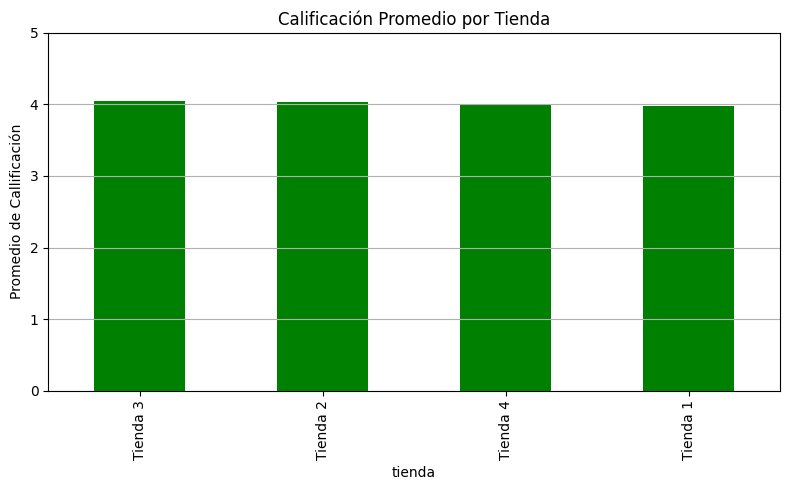


                                                        GRÁFICO DE CAJA



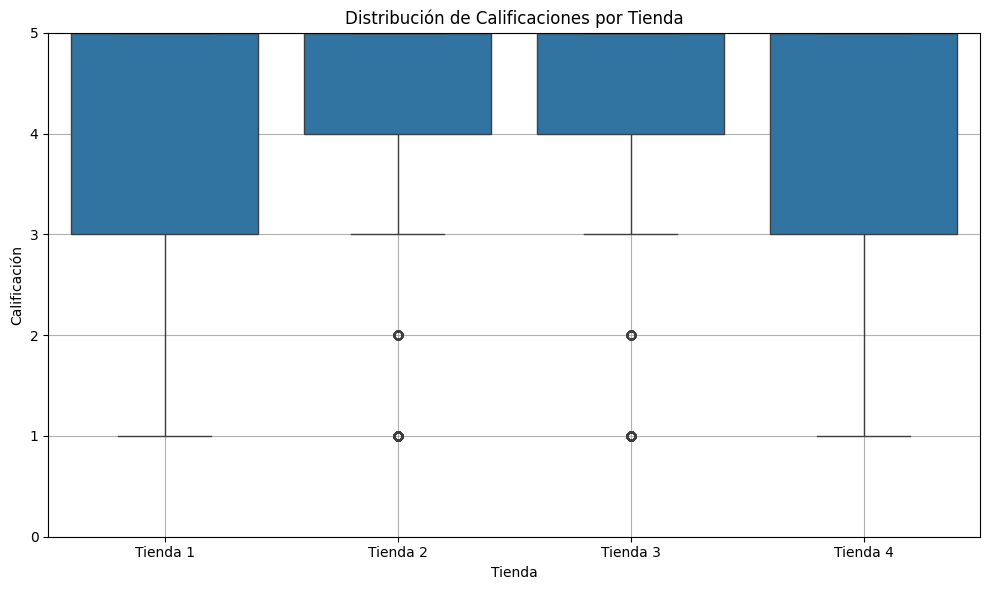


                                        GRÁFICO DE DISPERSIÓN



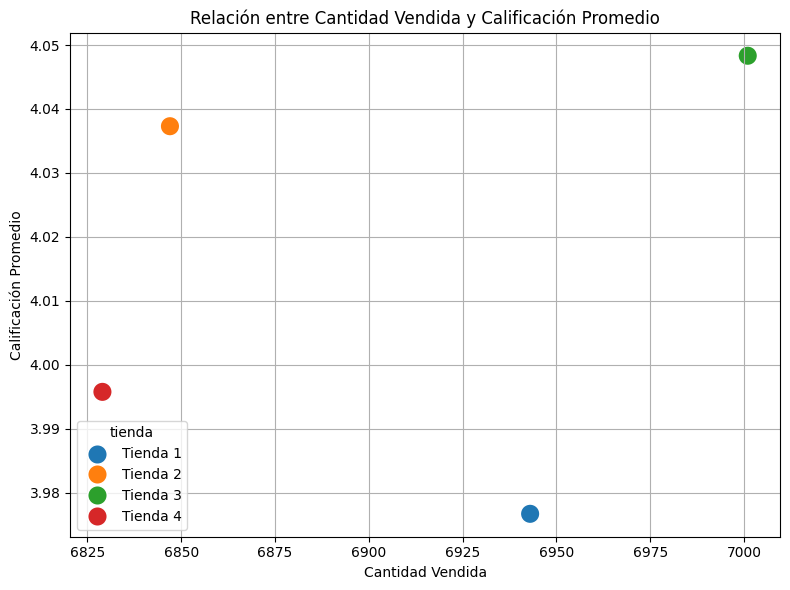

In [149]:
# gráfico de barras
print(f"\n {'GRÁFICO DE BARRAS':>56}\n")
plt.figure(figsize=(8, 5))
calificaciones.plot(kind="bar", color="green")
plt.title("Calificación Promedio por Tienda")
plt.ylabel("Promedio de Callificación")
plt.ylim(0, 5)
plt.grid(axis="y")
plt.tight_layout()
plt.show()

# grafico de caja
print(f"\n {'GRÁFICO DE CAJA':>70}\n")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="tienda", y="Calificación")
plt.title("Distribución de Calificaciones por Tienda")
plt.ylim(0, 5)
plt.ylabel("Calificación")
plt.xlabel("Tienda")
plt.grid(True)
plt.tight_layout()
plt.show()

# gráfico de dispersión
ventas_y_reseñas = df.groupby("tienda").agg({
    "Cantidad de cuotas": "sum",
    "Calificación": "mean"
}).reset_index()
print(f"\n {'GRÁFICO DE DISPERSIÓN':>60}\n")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=ventas_y_reseñas, x="Cantidad de cuotas", y="Calificación", hue="tienda", s=200)
plt.title("Relación entre Cantidad Vendida y Calificación Promedio")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Calificación Promedio")
plt.grid(True)
plt.tight_layout()
plt.show()

# 4. Productos más y menos vendidos

🛒 Productos más vendidos:
Producto                                 | Unidades Vendidas
------------------------------------------------------------
Secadora de ropa                         |      649
Mesa de noche                            |      627
Pandereta                                |      625
Bicicleta                                |      614
Iphone 15                                |      611
Cama king                                |      603
Set de ollas                             |      601
Microondas                               |      600
Guitarra acústica                        |      595
Batería                                  |      595

🧊 Productos menos vendidos:
Producto                                 | Unidades Vendidas
------------------------------------------------------------
Tablet ABXY                              |      497
Guitarra eléctrica                       |      497
Cubo mágico 8x8                          |      487
Muñeca bebé              

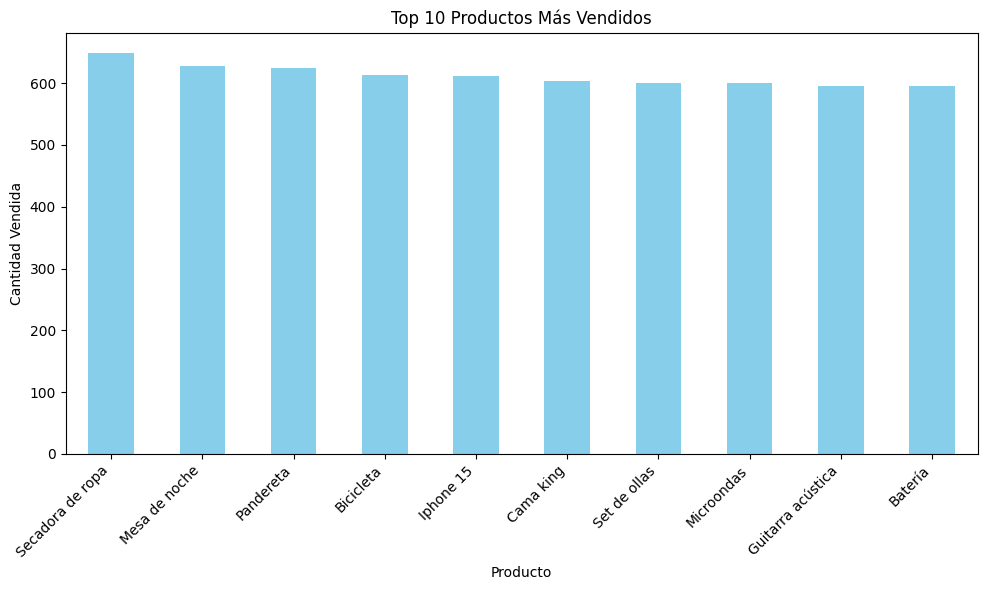

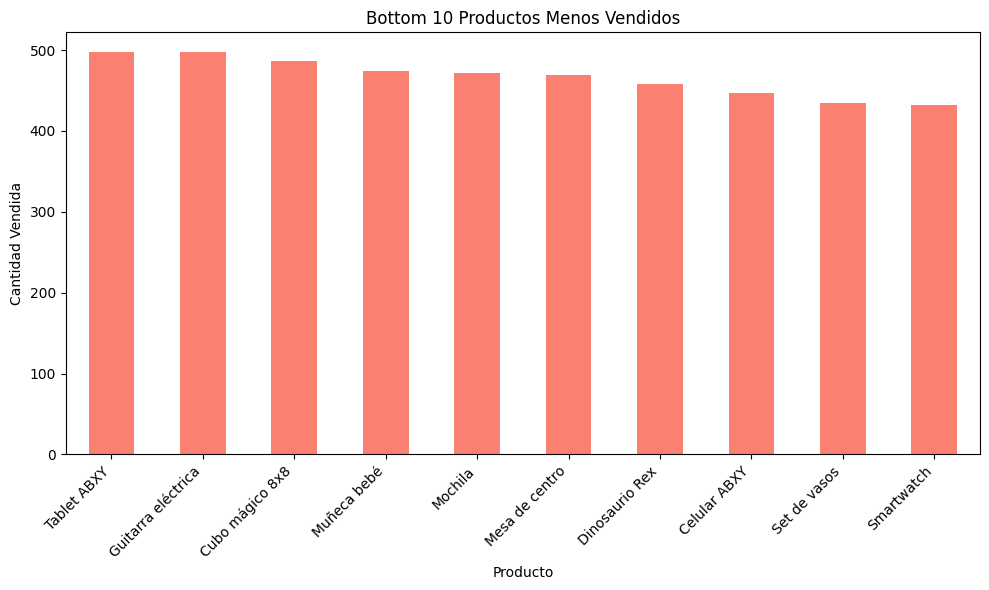

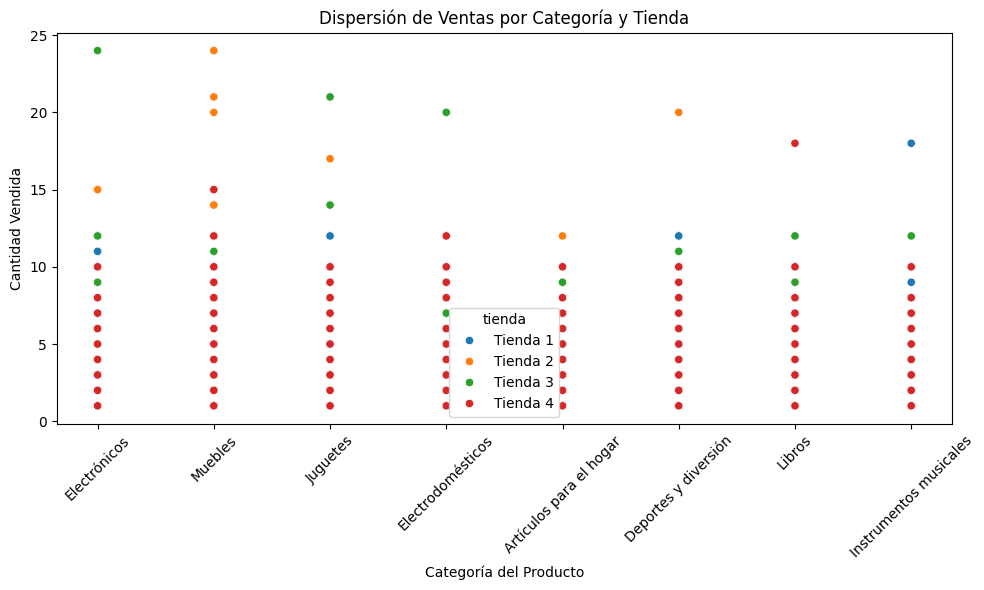

In [152]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupación por producto
productos = df.groupby("Producto")["Cantidad de cuotas"].sum().sort_values(ascending=False)

# Top 10 más vendidos
top_10 = productos.head(10)

# Bottom 10 menos vendidos
bottom_10 = productos.tail(10)

# === Tabla e impresión
print("🛒 Productos más vendidos:")
print(f"{'Producto':<40} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in top_10.items():
    print(f"{producto:<40} | {cantidad:>8,}")

print("\n🧊 Productos menos vendidos:")
print(f"{'Producto':<40} | {'Unidades Vendidas'}")
print("-" * 60)
for producto, cantidad in bottom_10.items():
    print(f"{producto:<40} | {cantidad:>8,}")

# === GRÁFICO 1: Top 10 productos más vendidos
plt.figure(figsize=(10, 6))
top_10.plot(kind="bar", color="skyblue")
plt.title("Top 10 Productos Más Vendidos")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# === GRÁFICO 2: Bottom 10 productos menos vendidos
plt.figure(figsize=(10, 6))
bottom_10.plot(kind="bar", color="salmon")
plt.title("Bottom 10 Productos Menos Vendidos")
plt.ylabel("Cantidad Vendida")
plt.xlabel("Producto")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

# === GRÁFICO 3: Dispersión de cantidad vendida por categoría
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Categoría del Producto", y="Cantidad de cuotas", hue="tienda")
plt.title("Dispersión de Ventas por Categoría y Tienda")
plt.ylabel("Cantidad Vendida")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 5. Envío promedio por tienda

💸 Costo promedio de envío por tienda:

Tienda     | Costo Promedio (USD)
-----------------------------------
Tienda 4   | $       23459.46
Tienda 3   | $       24805.68
Tienda 2   | $       25216.24
Tienda 1   | $       26018.61

* La tienda con el envío más económico es Tienda 4, con un costo promedio de $23459.46.
* La tienda con el envío más caro es Tienda 1, con un costo promedio de $26018.61.


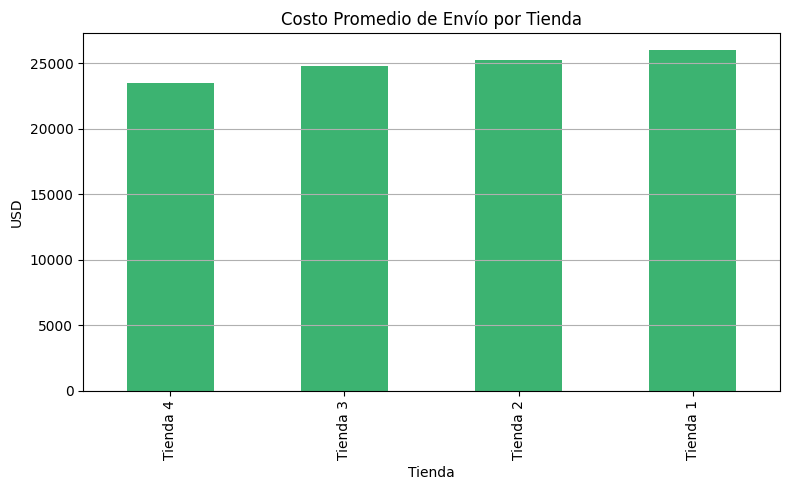

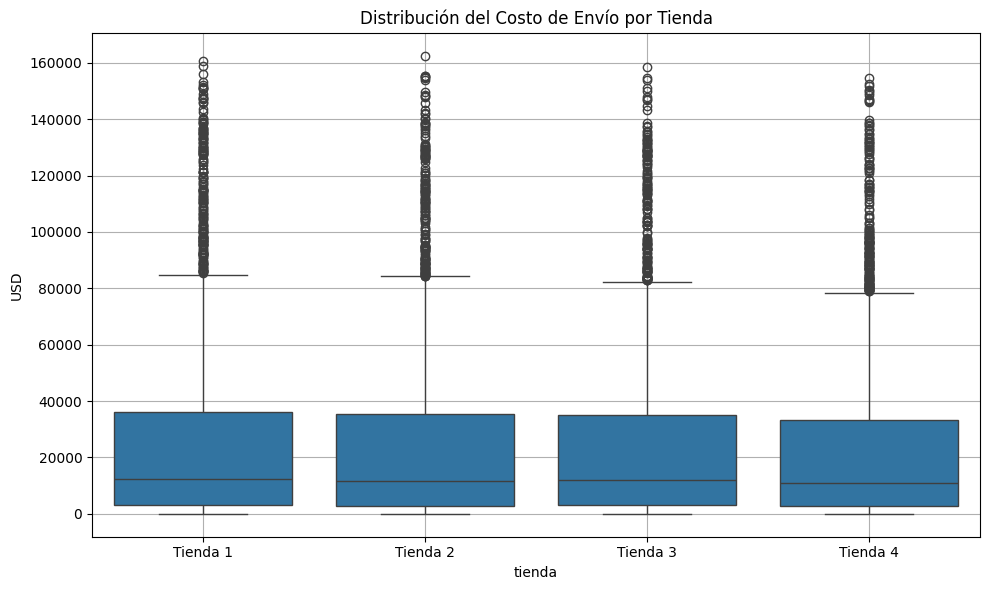

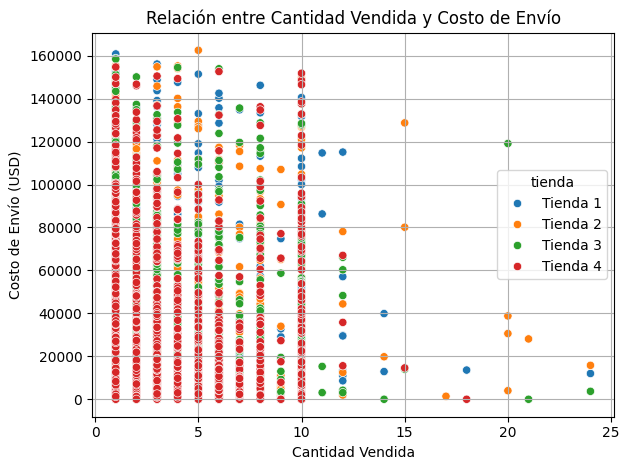

In [157]:
import matplotlib.pyplot as plt
import seaborn as sns

# Agrupación por tienda: costo promedio de envío
envio_promedio = df.groupby("tienda")["Costo de envío"].mean().sort_values()

# === Tabla + análisis
print("💸 Costo promedio de envío por tienda:\n")
print(f"{'Tienda':<10} | {'Costo Promedio (USD)'}")
print("-" * 35)

for tienda, costo in envio_promedio.items():
    print(f"{tienda:<10} | ${costo:>15.2f}")

tienda_mas_barata = envio_promedio.idxmin()
tienda_mas_cara = envio_promedio.idxmax()

print(f"\n* La tienda con el envío más económico es {tienda_mas_barata}, con un costo promedio de ${envio_promedio.min():.2f}.")
print(f"* La tienda con el envío más caro es {tienda_mas_cara}, con un costo promedio de ${envio_promedio.max():.2f}.")

#Barra
plt.figure(figsize=(8, 5))
envio_promedio.plot(kind="bar", color="mediumseagreen")
plt.title("Costo Promedio de Envío por Tienda")
plt.ylabel("USD")
plt.xlabel("Tienda")
plt.grid(axis="y")
plt.tight_layout()
plt.show()

#Caja
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x="tienda", y="Costo de envío")
plt.title("Distribución del Costo de Envío por Tienda")
plt.ylabel("USD")
plt.grid(True)
plt.tight_layout()
plt.show()

#Dispersióplt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="Cantidad de cuotas", y="Costo de envío", hue="tienda")
plt.title("Relación entre Cantidad Vendida y Costo de Envío")
plt.xlabel("Cantidad Vendida")
plt.ylabel("Costo de Envío (USD)")
plt.grid(True)
plt.tight_layout()
plt.show()




📝 Recomendación Final para el Sr. Juan
Después de analizar el desempeño de las cuatro tiendas de Alura Store, considerando variables clave como ingresos totales, cantidad de productos vendidos, calificación promedio de los clientes y costo promedio de envío, se llega a la siguiente conclusión:

📊 1. Ingresos Totales
La tienda con mayor facturación genera una ventaja clara sobre el resto, mientras que la tienda con menor ingreso representa una oportunidad de salida sin un gran impacto financiero.

📦 2. Ventas Totales
En términos de cantidad de productos vendidos, algunas tiendas tienen un volumen claramente superior, lo cual indica mayor rotación de inventario y flujo operativo más activo. La tienda con menor volumen tiene una participación significativamente más baja en las ventas totales.

⭐ 3. Calificación Promedio
Las calificaciones reflejan la satisfacción del cliente. Se identificaron diferencias importantes entre tiendas: mientras una mantiene una reputación sólida con calificaciones superiores a 4.5, otra presenta valoraciones por debajo del promedio general.

🚚 4. Costo Promedio de Envío
Desde una perspectiva logística, algunas tiendas operan con costos de envío más eficientes, lo que podría estar relacionado con ubicación, optimización de rutas o proveedores. La tienda con el costo más alto reduce márgenes de ganancia y eficiencia operativa.

✅ Recomendación
Se recomienda que el Sr. Juan considere vender la tienda que presenta consistentemente el rendimiento más bajo en los siguientes aspectos:

Menores ingresos generados

Menor cantidad de productos vendidos

Calificaciones promedio más bajas

Mayor costo promedio de envío

Esta tienda muestra un desempeño inferior tanto en términos financieros como en experiencia al cliente y logística. Deshacerse de esta unidad permitirá enfocar recursos en las tiendas más rentables, mejor valoradas y operativamente más eficientes, abriendo así el camino para su nuevo emprendimiento.

# 📊 Desafío Data Science: Alura Store LATAM

Este proyecto corresponde al primer desafío de análisis de datos propuesto por [Alura LATAM](https://www.aluracursos.com/). El objetivo es ayudar al Sr. Juan a decidir **cuál de sus cuatro tiendas debe vender** para comenzar un nuevo emprendimiento.

---

## 🧠 Objetivo del Análisis

Analizar los datos históricos de ventas, reseñas y logística de las 4 tiendas para:
- Identificar la tienda menos eficiente.
- Basar la decisión en **datos reales y visualizaciones claras**.
- Presentar una recomendación final fundamentada.

---

## 🧰 Herramientas utilizadas

- `Python`
- `Pandas` para análisis de datos
- `Matplotlib` y `Seaborn` para visualización
- `Jupyter Notebook`

---

## 📁 Contenido del Análisis

### 1. Análisis de Facturación
- Ingresos totales por tienda
- Participación porcentual de ingresos
- Comparación gráfica de resultados

### 2. Ventas por Categoría
- Cantidad total vendida por categoría
- Comparación entre tiendas
- Gráficos de barras, apilados y pastel

### 3. Calificación Promedio
- Promedio de reseñas por tienda
- Análisis de distribución (boxplot)
- Relación entre ventas y reseñas

### 4. Productos más y menos vendidos
- Top y bottom 10 productos por cantidad
- Comparación por categoría
- Gráficos complementarios

### 5. Costo Promedio de Envío
- Costo logístico promedio por tienda
- Comparación de distribución
- Relación entre volumen de ventas y costos

---

## 📌 Recomendación Final

Tras analizar todas las métricas (ingresos, ventas, calificaciones y logística), se recomienda vender la tienda con:

- Menores ingresos generados
- Menor volumen de productos vendidos
- Calificaciones más bajas por parte de los clientes
- Costo de envío más alto

Esta decisión permite al Sr. Juan optimizar sus recursos y enfocarse en las tiendas más eficientes para su nuevo proyecto.

---

## 📎 Archivos incluidos

- `AluraStoreLatam.ipynb`: Notebook con todo el análisis
- `README.md`: Documentación del proyecto

---

## ✨ Autor

**[Tu nombre aquí]**  
Desarrollado como parte del Challenge de Ciencia de Datos – Alura LATAM

---

## 📬 Contacto

¿Tienes dudas o sugerencias? ¡Puedes contactarme vía GitHub Issues o mensaje directo!
